In [ ]:
import spacy
import pandas as pd

import json
import spacy
import requests
import random
import time

import spacy
import tqdm
from collections import Counter

import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel


In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

In [ ]:
df = pd.read_csv("/content/final_dataframe_4790_articles.csv")
nlp = spacy.load("en_core_web_sm")

In [ ]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

In [ ]:
sentiment_scores = []

In [ ]:
df['headline'].fillna("",inplace=True)
df['lead_paragraph'].fillna("",inplace=True)
df['combined_text'] = df['headline'] + " " + df['lead_paragraph']
df['combined_text'] = df['combined_text'].astype(str)

In [ ]:
for article in df['combined_text']:
    inputs = tokenizer(article, return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = logits.argmax().item()
    sentiment = "POSITIVE" if predicted_class == 1 else "NEGATIVE" if predicted_class == 0 else "NEUTRAL"
    sentiment_scores.append(sentiment)

In [ ]:
df['sentiment'] = sentiment_scores

In [ ]:
total_articles = len(df)
positive_percentage = (df['sentiment'].value_counts(normalize=True).get('POSITIVE', 0) * 100).round(2)
negative_percentage = (df['sentiment'].value_counts(normalize=True).get('NEGATIVE', 0) * 100).round(2)
neutral_percentage = (df['sentiment'].value_counts(normalize=True).get('NEUTRAL', 0) * 100).round(2)

# Display percentages
print(f"Positive Sentiment Percentage: {positive_percentage}%")
print(f"Negative Sentiment Percentage: {negative_percentage}%")
print(f"Neutral Sentiment Percentage: {neutral_percentage}%")

Positive Sentiment Percentage: 10.9%
Negative Sentiment Percentage: 46.26%
Neutral Sentiment Percentage: 42.84%


In [ ]:
import matplotlib.pyplot as plt

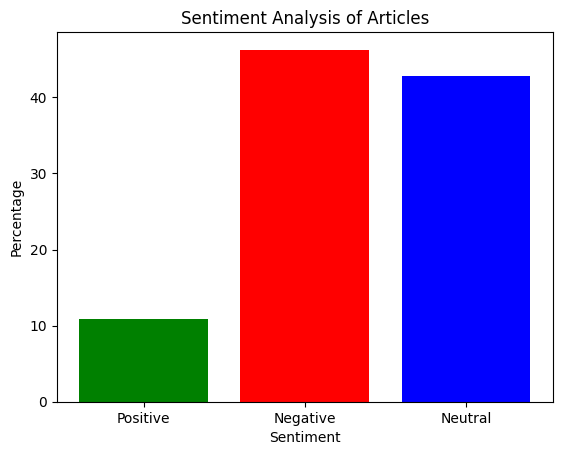

In [ ]:
labels = ['Positive', 'Negative', 'Neutral']
percentages = [positive_percentage, negative_percentage, neutral_percentage]

plt.bar(labels, percentages, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Analysis of Articles')
plt.show()

In [ ]:
df['year'] = pd.to_datetime(df['date']).dt.year

In [ ]:
# Sentiment analysis by year
sentiment_counts = df.groupby(['year', 'sentiment']).size().unstack(fill_value=0)
sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

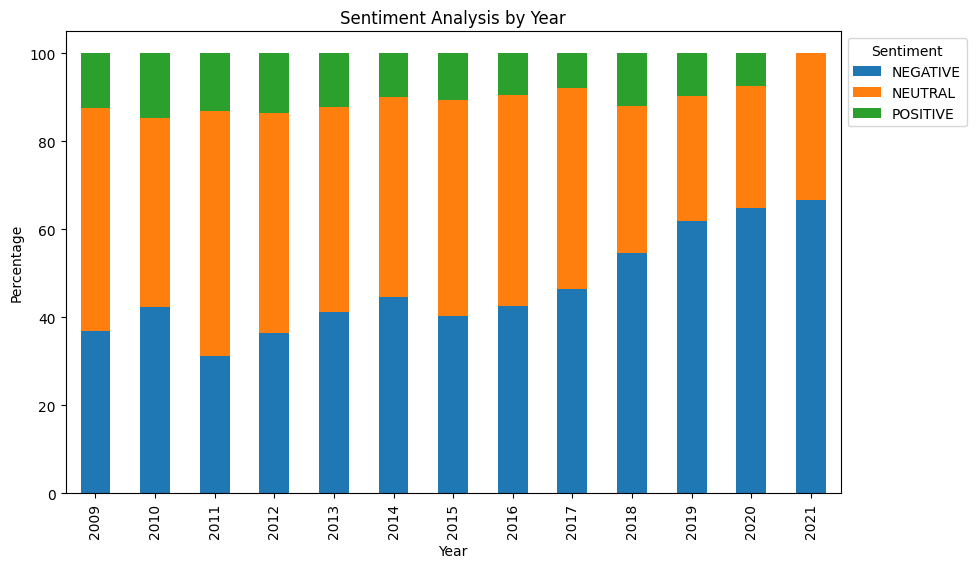

In [ ]:
# Plot the sentiment analysis by year
sentiment_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Sentiment Analysis by Year')
plt.legend(title='Sentiment', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()